In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold




In [2]:
df_features = pd.read_csv("features.csv")
df_sales = pd.read_csv("sales.csv")
df_stores = pd.read_csv("stores.csv")


In [3]:
df_features.shape

(8190, 12)

In [4]:
df_sales.shape

(421570, 5)

In [5]:
df_stores.shape

(45, 3)

In [6]:
df_features.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
counter = 0
for feature in df_features.isna():
    for booly in df_features.isna()[feature]:
        if booly == True and counter == 0:
            print(f"feature {feature} has NaN to be taken care of")
            counter = 1
    if counter != 1:
        print(f"No NaNs in {feature}")
    counter = 0
    


No NaNs in Store
No NaNs in Date
No NaNs in Temperature
No NaNs in Fuel_Price
feature MarkDown1 has NaN to be taken care of
feature MarkDown2 has NaN to be taken care of
feature MarkDown3 has NaN to be taken care of
feature MarkDown4 has NaN to be taken care of
feature MarkDown5 has NaN to be taken care of
feature CPI has NaN to be taken care of
feature Unemployment has NaN to be taken care of
No NaNs in IsHoliday


In [10]:
counter = 0
for feature in df_sales.isna():
    for booly in df_sales.isna()[feature]:
        if booly == True and counter == 0:
            print(f" feature {feature} has NaN to be taken care of")
            counter = 1
    if counter != 1:
        print(f"No NaNs in {feature}")
    counter = 0
    

No NaNs in Store
No NaNs in Dept
No NaNs in Date
No NaNs in Weekly_Sales
No NaNs in IsHoliday


In [11]:
counter = 0
for feature in df_stores.isna():
    for booly in df_stores.isna()[feature]:
        if booly == True and counter == 0:
            print(f" feature {feature} has NaN to be taken care of")
            counter = 1
    if counter != 1:
        print(f"No NaNs in {feature}")
    counter = 0
    

No NaNs in Store
No NaNs in Type
No NaNs in Size


In [12]:
df_features["Date"] = pd.to_datetime(df_features["Date"])
df_sales["Date"] = pd.to_datetime(df_sales["Date"])


In [13]:
for feature in df_features:
        mean_value=df_features[feature].mean()
        df_features[feature].fillna(value=mean_value, inplace=True)

In [14]:
counter = 0
for feature in df_features.isna():
    for booly in df_features.isna()[feature]:
        if booly == True and counter == 0:
            print(f"feature {feature} has NaN to be taken care of")
            counter = 1
    if counter != 1:
        print(f"No NaNs in {feature}")
    counter = 0
    

No NaNs in Store
No NaNs in Date
No NaNs in Temperature
No NaNs in Fuel_Price
No NaNs in MarkDown1
No NaNs in MarkDown2
No NaNs in MarkDown3
No NaNs in MarkDown4
No NaNs in MarkDown5
No NaNs in CPI
No NaNs in Unemployment
No NaNs in IsHoliday


In [15]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,False


In [16]:
df_sales = df_sales.drop(["IsHoliday"], axis = 1)

In [17]:
merged_df = df_features.merge(df_sales, how = 'left', on = ['Date', 'Store'])

In [18]:
merged_df = merged_df.merge(df_stores, how = "left", on = ["Store"])

In [19]:
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,1.0,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,2.0,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,3.0,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,4.0,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,False,5.0,32229.38,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,False,NaN,NaN,B,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,False,NaN,NaN,B,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,False,NaN,NaN,B,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,False,NaN,NaN,B,118221


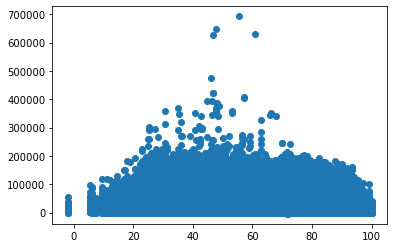

In [20]:
plt.scatter(merged_df["Temperature"], merged_df["Weekly_Sales"])

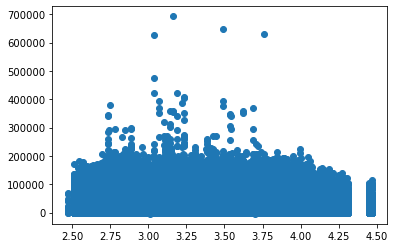

In [21]:
plt.scatter(merged_df["Fuel_Price"], merged_df["Weekly_Sales"])

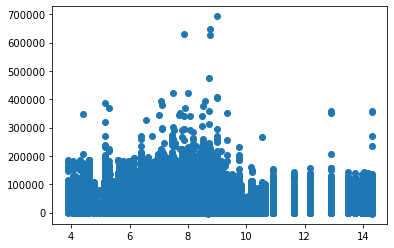

In [22]:
plt.scatter(merged_df["Unemployment"], merged_df["Weekly_Sales"])

In [23]:
le1 = preprocessing.LabelEncoder()
merged_df["Type"] = le1.fit_transform(merged_df["Type"])
le2 = preprocessing.LabelEncoder()
merged_df["IsHoliday"] = le1.fit_transform(merged_df["IsHoliday"])
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,1.0,24924.50,0,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,2.0,50605.27,0,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,3.0,13740.12,0,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,4.0,39954.04,0,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,5.0,32229.38,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,0,NaN,NaN,1,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,0,NaN,NaN,1,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,0,NaN,NaN,1,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,0,NaN,NaN,1,118221


In [24]:
for feature in merged_df:
        mean_value=merged_df[feature].mean()
        merged_df[feature].fillna(value=mean_value, inplace=True)

In [25]:
merged_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,1.000000,24924.500000,0,151315
1,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,2.000000,50605.270000,0,151315
2,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,3.000000,13740.120000,0,151315
3,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,4.000000,39954.040000,0,151315
4,1,2010-02-05,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106000,0,5.000000,32229.380000,0,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.290000,975.030000,3.00000,2449.970000,3169.690000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423321,45,2013-07-05,77.50,3.614,9090.480000,2268.580000,582.74000,5797.470000,1514.930000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423322,45,2013-07-12,79.37,3.614,3789.940000,1827.310000,85.72000,744.840000,2150.360000,172.460809,7.826821,0,44.260317,15981.258123,1,118221
423323,45,2013-07-19,82.84,3.737,2961.490000,1047.070000,204.19000,363.000000,1059.460000,172.460809,7.826821,0,44.260317,15981.258123,1,118221


In [59]:
X = merged_df.drop(columns=["Weekly_Sales","Date"])
y = merged_df["Weekly_Sales"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [61]:
scaler = preprocessing.StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [62]:
reg = LinearRegression().fit(X_scaled_train, y_train)
if reg.score(X_scaled_test,y_test) < 0.1:
    print(reg.score(X_scaled_test,y_test))
    print("LinearRegression is not suitable")

0.0866628080469325
LinearRegression is not suitable


In [63]:
try:
    log_model = LogisticRegression(random_state=0)
    log_model.fit(X_scaled_train, y_train)
    log_model.score(X_scaled_test,y_test)
except ValueError:
    print("LogisticRegression is not suitable")


LogisticRegression is not suitable


In [50]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_scaled_train, y_train)
train_score = xgbr.score(X_scaled_train, y_train)
print(train_score)
test_score = xgbr.score(X_scaled_test, y_test) 
test_score

0.930703968266768


0.9204273789603483

In [51]:
scores = cross_val_score(xgbr, X_scaled_test, y_test,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.91


Text(0.5, 1.0, 'Feature Importance')

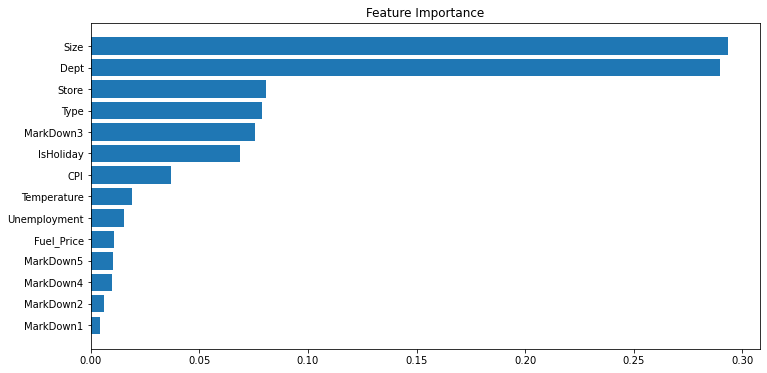

In [64]:
X_test = pd.DataFrame(X_test, columns=X.columns)
feature_importance = xgbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')
